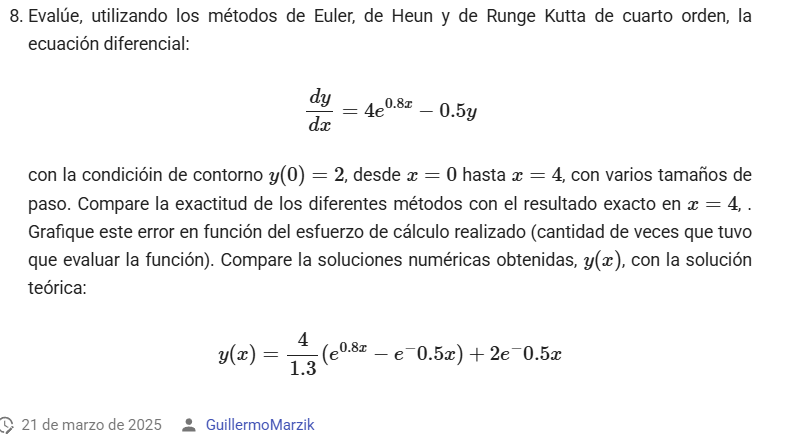

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
def ec_diferencial(x,y):

    ecudiff = 4 * np.exp( 0.8 * x ) - 0.5 * y 

    return ecudiff

In [6]:
def fun_real(x):

    ecureal = ( 4 / 1.3 ) * ( np.exp( 0.8 * x ) - np.exp( -0.5 * x )) + 2 * np.exp( -0.5 * x )

    return ecureal

In [7]:
#   Evaluo x = 4 para la solucioon teorica

print(fun_real(4))


75.33896260915857


params = [xi,yi]
Es una lista de parametros que se va actualizaznao 

El metodo de Euler se define como:
 
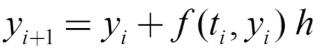

In [8]:
def euler(params,fxy,h):

    euler = params[1] + fxy(params[0] , params[1]) * h 

    return euler

El metodo de Heun se define como:

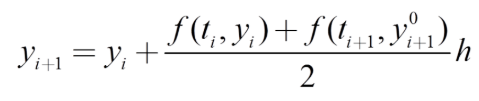

In [14]:
def heun (params,fxy,euler,paso):

    y0 = euler(params,fxy,paso)

    x_actual = params[0]
    y_actual = params[1]
    
    eval_y0 = fxy(x_actual+paso,y0)

    y_nuevo = y_actual + (paso/2) * (fxy(x_actual,y_actual) + eval_y0)

    return y_nuevo

El metodo de Runge Kutta de orden 4 se define como: 

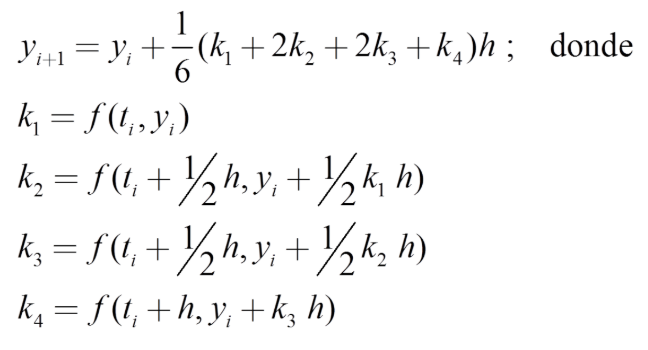

In [20]:
def rk4(params,fxy,paso):

    x_actual = params[0]
    y_actual = params[1]

    k1 = fxy(x_actual,y_actual)
    k2 = fxy(x_actual + paso/2,y_actual + paso/2 * k1)
    k3 = fxy(x_actual + paso/2,y_actual + paso/2 * k2)
    k4 = fxy(x_actual + paso,y_actual + paso * k3)

    pendiente_prom = (1/6) * (k1 + 2*k2 + 2*k3 + k4)

    y_nuevo = y_actual + pendiente_prom * paso

    return y_nuevo


In [18]:
# Constantes del problema

x = [0]
y = [2]

x_final = 4

paso  = 0.005

# Esto me da la cantidad de intervalos que tengo

N = int(x_final//paso)

# ............................................................................................................

for i in range(N):
    
    # Se pide siempre que evalue el ultimo dato que tiene cargado

    y_nuevo = euler([x[-1],y[-1]],ec_diferencial,paso)

    y.append(y_nuevo)

    x.append(paso+paso*i)


# El ultimo valor que tiene cargado es el que evaluo ... 

print(y[-1])


74.94559673356792


In [19]:
# Constantes del problema

x = [0]
y = [2]

x_final = 4

paso  = 0.005

# Esto me da la cantidad de intervalos que tengo

N = int(x_final//paso)

# ............................................................................................................

for i in range(N):

    y_nuevo = heun([x[-1],y[-1]],ec_diferencial,euler,paso)

    y.append(y_nuevo)

    x.append(paso+paso*i)

# El ultimo valor que tiene cargado es el que evaluo ... 

print(y[-1])

75.03743823917318


In [22]:
# Constantes del problema

x = [0]
y = [2]

x_final = 4

paso  = 0.005

# Esto me da la cantidad de intervalos que tengo

N = int(x_final//paso)

# ............................................................................................................

for i in range(N):

    y_nuevo = rk4([x[-1],y[-1]],ec_diferencial,paso)

    y.append(y_nuevo)

    x.append(paso+paso*i)

# El ultimo valor que tiene cargado es el que evaluo ... 

print(y[-1])

75.03726202926762


In [23]:
pasos = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

y_euler = []
y_heun = []
y_rk4 = []

for p in pasos: 

    N = int(x_final//p)

    for i in range(3):
        x =[0]
        y =[2]

        if i == 0:
            for j in range(N):
                y_nuevo = euler([x[-1],y[-1]],ec_diferencial,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_euler.append(y[-1])

        elif i == 1: 
            for j in range(N):
                y_nuevo = heun([x[-1],y[-1]],ec_diferencial,euler,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_heun.append(y[-1])
        elif i == 2: 
            for j in range(N):
                y_nuevo = rk4([x[-1],y[-1]],ec_diferencial,p)
                y.append(y_nuevo)
                x.append(p+p*j)
            y_rk4.append(y[-1])

In [24]:
y_real = fun_real(4)
dif_euler = abs(y_real - y_euler)
dif_heun = abs(y_real - y_heun)
dif_rk4 = abs(y_real - y_rk4)

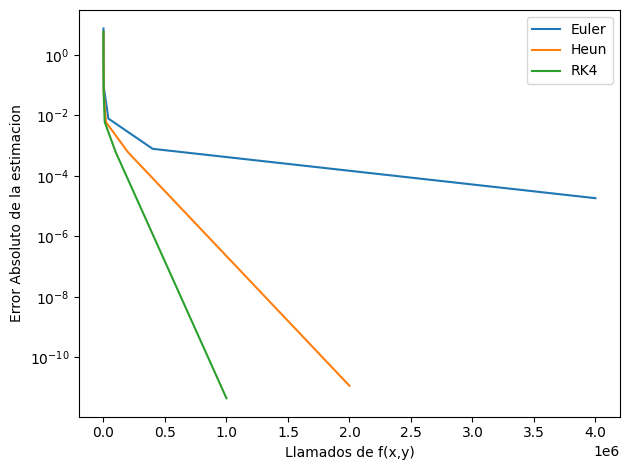

In [26]:
fig , ax =plt.subplots()

ax.plot(x_final//np.array(pasos), dif_euler, label='Euler')
ax.plot(x_final//(2*np.array(pasos)), dif_heun, label='Heun')
ax.plot(x_final//(4*np.array(pasos)), dif_rk4, label='RK4')

ax.set_xlabel('Llamados de f(x,y)')
ax.set_ylabel('Error Absoluto de la estimacion')

#ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()
plt.tight_layout()
plt.show()


Instalar pip install nbdime